# Import dependencies

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Import Data and Visualise

In [2]:
crop = pd.read_csv("Crop_recommendation.csv")

In [3]:
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [6]:
crop.shape

(2200, 8)

In [7]:
crop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


### **Dataset Overview**  

The dataset contains **2200 rows** and **8 columns**, with no missing values. It includes both numerical and categorical data.  

1. **N, P, K**: Integer values representing the nitrogen, phosphorus, and potassium content in the soil.  
2. **Temperature**: A floating-point value indicating the temperature (possibly in Celsius).  
3. **Humidity**: A floating-point value representing the humidity level.  
4. **pH**: A floating-point value indicating the soil pH level.  
5. **Rainfall**: A floating-point value representing the amount of rainfall received.  
6. **Label**: A categorical variable that likely represents the crop type or classification based on the given soil and environmental conditions.  

In [8]:
crop.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [9]:
crop.duplicated().sum()

0

In [10]:
crop.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [18]:
corr = crop.corr(numeric_only=True)
corr

,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020
P,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839
K,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461
temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084
humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423
ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069
rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000


# Univariate Analysis

### Distribution of Each Feature (Histograms & Boxplots)

<Figure size 1200x800 with 0 Axes>

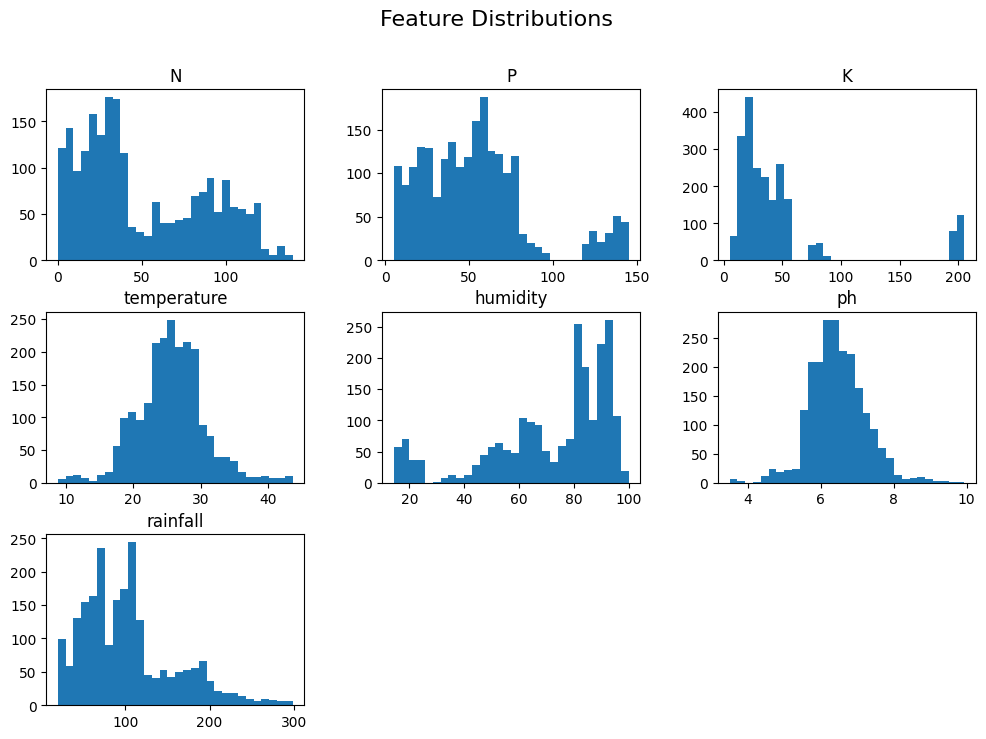

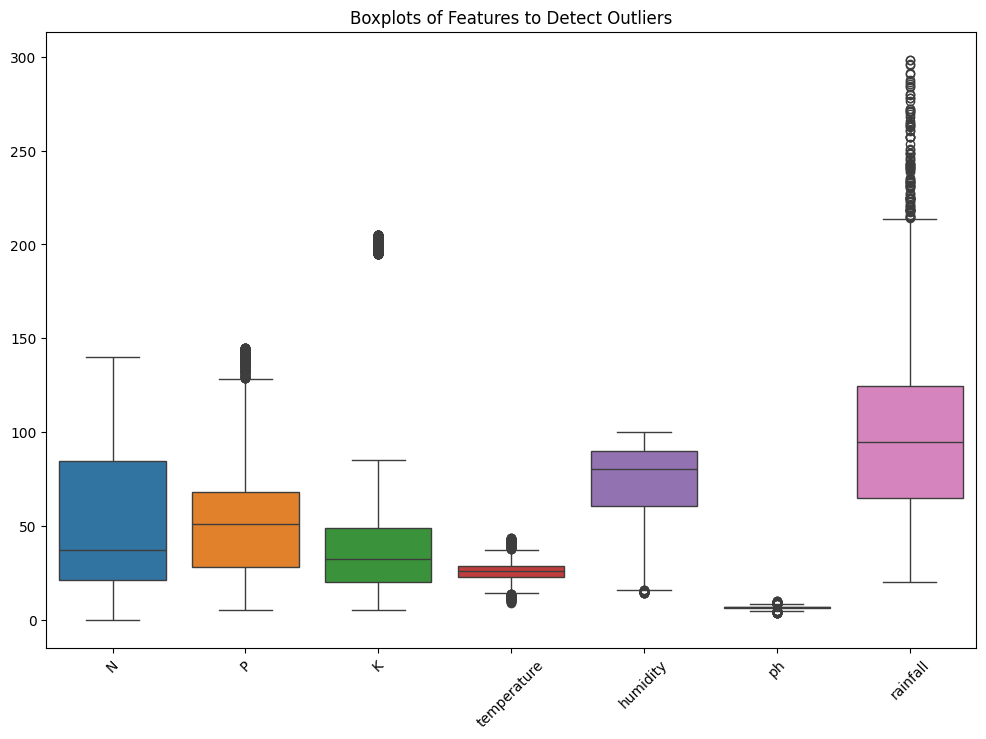

In [6]:
# Set figure size
plt.figure(figsize=(12, 8))

# Create histograms
crop.hist(bins=30, figsize=(12, 8), grid=False)
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

# Boxplots to detect outliers
plt.figure(figsize=(12, 8))
sns.boxplot(data=crop.iloc[:, :-1])  # Excluding the categorical column 'label'
plt.xticks(rotation=45)
plt.title("Boxplots of Features to Detect Outliers")
plt.show()

### Observations of feature distributions - 
1. **N (Nitrogen), P (Phosphorus), K (Potassium)**: These soil nutrients show a skewed distribution with several peaks, indicating that certain levels of these nutrients are more common in the dataset.
2. **Temperature**: The distribution appears approximately normal, with most values clustered around a central range.
3. **Humidity**: The histogram suggests a bimodal distribution, meaning that the dataset contains two distinct groups of humidity levels.
4. **pH**: The pH values follow a bell-shaped curve, indicating a normal distribution centered around a common pH range.
5. **Rainfall**: The distribution of rainfall values appears right-skewed, meaning a majority of values are on the lower side, with some extreme higher values.

### Conclusions from Boxplots (Outlier Analysis)

1. **Presence of Outliers**:  
   - The dataset contains outliers in multiple features, as indicated by the dots beyond the whiskers of the boxplots.
   - **K (Potassium), P (Phosphorus), and Rainfall** show a significant number of extreme values.
   - **Temperature, Humidity, and pH** have fewer outliers but still exhibit some deviations.


2. **Specific Observations**:  
   - **Nitrogen (N)**: A relatively wide distribution with a few high outliers.
   - **Phosphorus (P) & Potassium (K)**: Display several high-value outliers, suggesting extreme variations in soil fertility.
   - **Temperature**: Few outliers exist, but the feature appears to have a compact range.
   - **Humidity**: Some minor outliers are present but within an acceptable range.
   - **pH**: A small number of outliers, indicating slightly extreme soil acidity/alkalinity values.
   - **Rainfall**: The most significant outliers, suggesting that some locations receive abnormally high rainfall compared to the majority.

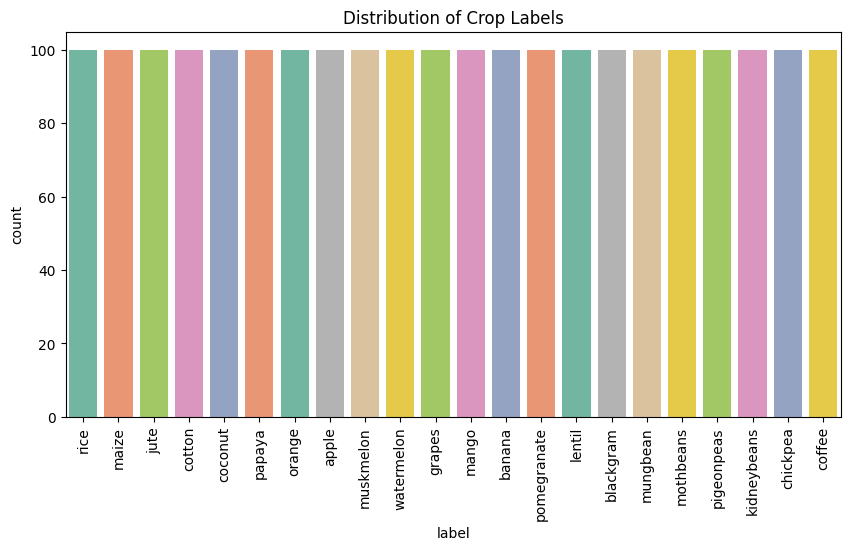

In [15]:
plt.figure(figsize=(10, 5))
sns.countplot(data=crop, x='label', order=crop['label'].value_counts().index, hue='label', palette="Set2", legend=False)
plt.xticks(rotation=90)
plt.title("Distribution of Crop Labels")
plt.show()

In [22]:
crop['label'].value_counts()

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

# Multivariate analysis

<Axes: >

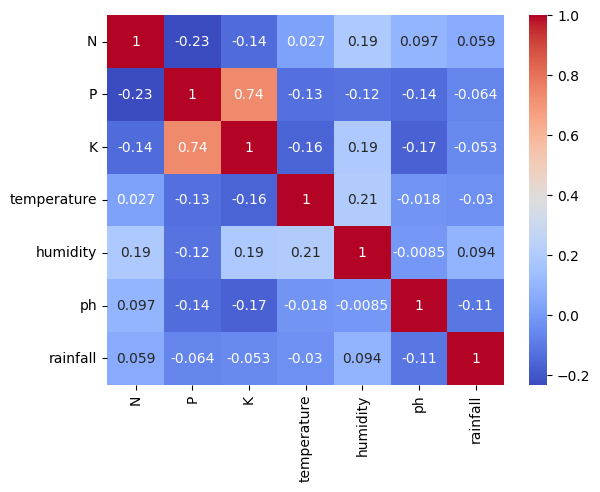

In [21]:
sns.heatmap(crop.corr(numeric_only=True), annot = True, cbar=True, cmap='coolwarm')

### **Readings from the Correlation Heatmap**:

1. **Strong Positive Correlations**:
   - **P (Phosphorus) and K (Potassium) (0.74)**: These two soil nutrients are highly correlated, indicating that they tend to increase or decrease together.
   - **Humidity and Temperature (0.21)**: A moderate positive correlation suggests that higher temperatures are somewhat associated with higher humidity levels.

2. **Negative Correlations**:
   - **N (Nitrogen) and P (Phosphorus) (-0.23)**: Indicates that as Nitrogen increases, Phosphorus tends to decrease, and vice versa.
   - **P (Phosphorus) and Temperature (-0.13)**: A weak inverse relationship, meaning that phosphorus levels may be slightly lower in higher temperatures.
   - **pH and Rainfall (-0.11)**: Suggests that increased rainfall slightly reduces soil pH, making it more acidic.

3. **Near-Zero Correlations (No Significant Relationship)**:
   - **N (Nitrogen) and Temperature (0.027)**: Virtually no relationship between Nitrogen levels and temperature.
   - **Temperature and pH (-0.018)**: Minimal impact of temperature on soil pH.
   - **Rainfall and K (-0.053)**: No clear connection between rainfall and Potassium content.

# Data Preprocessing

In [29]:
# Encoding

crop_dict = {
    'rice' : 1,
    'maize' : 2,
    'jute' : 3,
    'cotton' : 4,
    'coconut' : 5,
    'papaya' : 6,
    'orange' : 7,
    'apple' : 8,
    'muskmelon' : 9,
    'watermelon' : 10,
    'grapes' : 11,
    'mango' : 12,
    'banana' : 13,
    'pomegranate' : 14,
    'lentil' : 15,
    'blackgram' : 16,
    'mungbean' : 17,
    'mothbeans' : 18,
    'pigeonpeas' : 19,
    'kidneybeans' : 20,
    'chickpea' : 21,
    'coffee' : 22,
}

crop['crop_num'] = crop['label'].map(crop_dict)

In [30]:
crop['crop_num'].value_counts()

crop_num
1     100
2     100
3     100
4     100
5     100
6     100
7     100
8     100
9     100
10    100
11    100
12    100
13    100
14    100
15    100
16    100
17    100
18    100
19    100
20    100
21    100
22    100
Name: count, dtype: int64

In [33]:
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,crop_num
0,90,42,43,20.879744,82.002744,6.502985,202.935536,1
1,85,58,41,21.770462,80.319644,7.038096,226.655537,1
2,60,55,44,23.004459,82.320763,7.840207,263.964248,1
3,74,35,40,26.491096,80.158363,6.980401,242.864034,1
4,78,42,42,20.130175,81.604873,7.628473,262.717340,1


# Spliting the Data

In [35]:
X = crop.drop('crop_num', axis=1)
y = crop['crop_num']

In [36]:
X.shape

(2200, 7)

In [37]:
y.shape

(2200,)

In [39]:
# Step 1: Split into training and test sets (80% training, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Split the training set into training and validation sets (10% of the original data for validation)
# Since X_train is now 80% of the original data, 0.125 * 80% = 10% of the original data
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.125, random_state=42)

print(f"Training set size: {len(X_train)}")
print(f"Validation set size: {len(X_val)}")
print(f"Test set size: {len(X_test)}")

Training set size: 1540
Validation set size: 220
Test set size: 440


# Scaling 0 to 1

In [41]:
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()

# Fit the scaler on the training data
ms.fit(X_train)

# Apply the transformation to the training, test, and validation sets
X_train = ms.transform(X_train)
X_test = ms.transform(X_test)
X_val = ms.transform(X_val)

In [42]:
X_train

array([[0.61428571, 0.64285714, 0.22      , ..., 0.74406479, 0.45937902,
        0.31644742],
       [0.01428571, 0.52857143, 0.05      , ..., 0.59736129, 0.62213387,
        0.05532372],
       [0.52857143, 0.31428571, 0.165     , ..., 0.66711658, 0.61944828,
        0.51810557],
       ...,
       [0.9       , 0.29285714, 0.1       , ..., 0.78667415, 0.50583739,
        0.14535022],
       [0.12142857, 0.42142857, 0.055     , ..., 0.20973232, 0.5687174 ,
        0.57640818],
       [0.14285714, 0.17142857, 0.025     , ..., 0.92171164, 0.60039449,
        0.28910728]])

# Standarization

In [44]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

# Fit the scaler on the training data
sc.fit(X_train)

# Apply the transformation to the training, test, and validation sets
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)
X_val = sc.transform(X_val)

In [45]:
X_train

array([[ 0.94407651,  1.23466216,  0.00713496, ...,  0.27979853,
        -0.01735518,  0.11052095],
       [-1.30638394,  0.75811842, -0.65291193, ..., -0.29525641,
         1.32711764, -1.20461981],
       [ 0.62258216, -0.13540108, -0.20640962, ..., -0.02182651,
         1.30493277,  1.12616545],
       ...,
       [ 2.01572434, -0.22475303, -0.45878049, ...,  0.4468206 ,
         0.36642461, -0.75120436],
       [-0.904516  ,  0.31135867, -0.63349879, ..., -1.81470168,
         0.88585894,  1.41980456],
       [-0.82414242, -0.73108075, -0.74997765, ...,  0.97614654,
         1.14753462, -0.02717677]])

# Model Training

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

In [47]:
# create instances of all models
models = {
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': GaussianNB(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Bagging': BaggingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Extra Trees': ExtraTreeClassifier(),
}

In [50]:
for name, md in models.items():
    md.fit(X_train, y_train)
    ypred = md.predict(X_test)

    print(f"{name} with accuracy : {accuracy_score(y_test,ypred)}")

Logistic Regression with accuracy : 0.9613636363636363
Naive Bayes with accuracy : 0.9954545454545455
Support Vector Machine with accuracy : 0.9681818181818181
K-Nearest Neighbors with accuracy : 0.9613636363636363
Decision Tree with accuracy : 0.9795454545454545
Random Forest with accuracy : 0.9931818181818182
Bagging with accuracy : 0.9818181818181818


C:\Users\projj\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost with accuracy : 0.2
Gradient Boosting with accuracy : 0.9840909090909091
Extra Trees with accuracy : 0.8727272727272727


In [51]:
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
ypred = rfc.predict(X_test)
accuracy_score(y_test,ypred)

0.9931818181818182

# Model Evaluation

In [53]:
# Make predictions on the validation data
y_val_pred = rfc.predict(X_val)

# Calculate the accuracy on the validation set
val_accuracy = accuracy_score(y_val, y_val_pred)

print(f"Validation Accuracy: {val_accuracy:.4f}")

Validation Accuracy: 0.9909


In [54]:
def recommendation(N,P,k,temperature,humidity,ph,rainfal):
    features = np.array([[N,P,k,temperature,humidity,ph,rainfal]])
    transformed_features = ms.fit_transform(features)
    transformed_features = sc.fit_transform(transformed_features)
    prediction = rfc.predict(transformed_features).reshape(1,-1)
    
    return prediction[0] 

In [55]:
N = 40
P = 50
k = 50
temperature = 40.0
humidity = 20
ph = 100
rainfall = 100

predict = recommendation(N,P,k,temperature,humidity,ph,rainfall)


crop_dict = {1: "Rice", 2: "Maize", 3: "Jute", 4: "Cotton", 5: "Coconut", 6: "Papaya", 7: "Orange",
                 8: "Apple", 9: "Muskmelon", 10: "Watermelon", 11: "Grapes", 12: "Mango", 13: "Banana",
                 14: "Pomegranate", 15: "Lentil", 16: "Blackgram", 17: "Mungbean", 18: "Mothbeans",
                 19: "Pigeonpeas", 20: "Kidneybeans", 21: "Chickpea", 22: "Coffee"}

if predict[0] in crop_dict:
    crop = crop_dict[predict[0]]
    print("{} is a best crop to be cultivated ".format(crop))
else:
    print("Sorry are not able to recommend a proper crop for this environment")

Papaya is a best crop to be cultivated 


In [56]:
import pickle
pickle.dump(rfc,open('crop_recommend.pkl','wb'))
pickle.dump(ms,open('crop_recommend_minmax.pkl','wb'))
pickle.dump(sc,open('crop_recommend_standscaler.pkl','wb'))